In [1]:
from typing import Literal
from pathlib import Path
from geosolver.api import GeometricSolverBuilder
from collections import defaultdict
from geosolver.statement import Statement
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

In [2]:
problems = [
    "translated_imo_2000_p1",
    "translated_imo_2000_p6",
    "translated_imo_2002_p2a",
    "translated_imo_2002_p2b",
    "translated_imo_2003_p4",
    "translated_imo_2004_p1",
    "translated_imo_2004_p5",
    "translated_imo_2005_p5",
    "translated_imo_2007_p4",
    "translated_imo_2008_p1a",
    "translated_imo_2008_p1b",
    # "translated_imo_2008_p6",
    "translated_imo_2009_p2",
    "translated_imo_2010_p2",
    "translated_imo_2010_p4",
    "translated_imo_2011_p6",
    "translated_imo_2012_p1",
    "translated_imo_2012_p5",
    "translated_imo_2013_p4",
    "translated_imo_2014_p4",
    "translated_imo_2015_p3",
    "translated_imo_2015_p4",
    "translated_imo_2016_p1",
    "translated_imo_2017_p4",
    "translated_imo_2018_p1",
    "translated_imo_2019_p2",
    "translated_imo_2019_p6",
    "translated_imo_2020_p1",
    "translated_imo_2021_p3",
    "translated_imo_2022_p4",
]

for problem in problems:
    with open(f"../profiling_exp/{problem}/run_infos.txt", "r", encoding='utf-8') as f:
        # print("original rule set", problem, eval(f.read())['success'], eval(f.read())['runtime'])
        if eval(f.read())['success']:
            print(problem)

translated_imo_2000_p1
translated_imo_2002_p2a
translated_imo_2002_p2b
translated_imo_2003_p4
translated_imo_2004_p5
translated_imo_2005_p5
translated_imo_2007_p4
translated_imo_2010_p4
translated_imo_2012_p1
translated_imo_2013_p4
translated_imo_2014_p4
translated_imo_2015_p4
translated_imo_2016_p1
translated_imo_2017_p4
translated_imo_2022_p4


In [3]:
problems = [
    "translated_imo_2000_p1",
    "translated_imo_2002_p2a",
    "translated_imo_2002_p2b",
    "translated_imo_2003_p4",
    "translated_imo_2004_p5",
    "translated_imo_2005_p5",
    "translated_imo_2007_p4",
    "translated_imo_2010_p4",
    "translated_imo_2012_p1",
    "translated_imo_2013_p4",
    "translated_imo_2014_p4",
    "translated_imo_2015_p4",
    "translated_imo_2016_p1",
    "translated_imo_2017_p4",
    "translated_imo_2022_p4",
]

In [4]:
def level_stats(exp: str, problem: str, level0: Literal['goals', 'premises']):
    envpath = Path(f"../profiling_{exp}")
    problems_file = Path("../problems_datasets/imo_ag_30.txt")
    problem_path = envpath / problem

    builder = GeometricSolverBuilder(998244353)
    builder.load_problem_from_file(problems_file, problem)
    builder.with_problem_path(problem_path)
    builder.load_rules_from_file(envpath / "rules.txt")
    solver = builder.build()
    solver.run()
    deps = solver.proof.dep_graph.proof_deps(solver.goals)
    level: defaultdict[Statement, int] = defaultdict(lambda:0)
    if level0 == 'goals':
        for dep in reversed(deps):
            for statement in dep.why:
                level[statement] = max(level[dep.statement]+1, level[statement])
    else:
        for dep in deps:
            for statement in dep.why:
                level[dep.statement] = max(level[statement]+1, level[dep.statement])

    level_cnt: defaultdict[int, int] = defaultdict(lambda:0)
    for dep in deps:
        level_cnt[level[dep.statement]] += 1
    nlevel = len(level_cnt)
    return [level_cnt[i] for i in range(nlevel)]

In [5]:
def show_plt(exp: str, level0: Literal['goals', 'premises']):
    num_problems = len(problems)
    data: list[list[int]] = []
    num_problems = len(problems)
    for i in range(num_problems):
        data.append(level_stats(exp, problems[i], level0))
    fig, axes = plt.subplots(nrows=num_problems, ncols=1, sharey=True, sharex=True, figsize=(5, 40))
    for i in range(num_problems):
        ax: plt.Axes = axes[i]
        if level0 == 'goals':
            ax.invert_xaxis()
        level_cnts = np.array(data[i])
        ax.bar(x=range(len(level_cnts)), height=level_cnts*2, bottom=-level_cnts)
        ax.set_xlabel(problems[i])
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

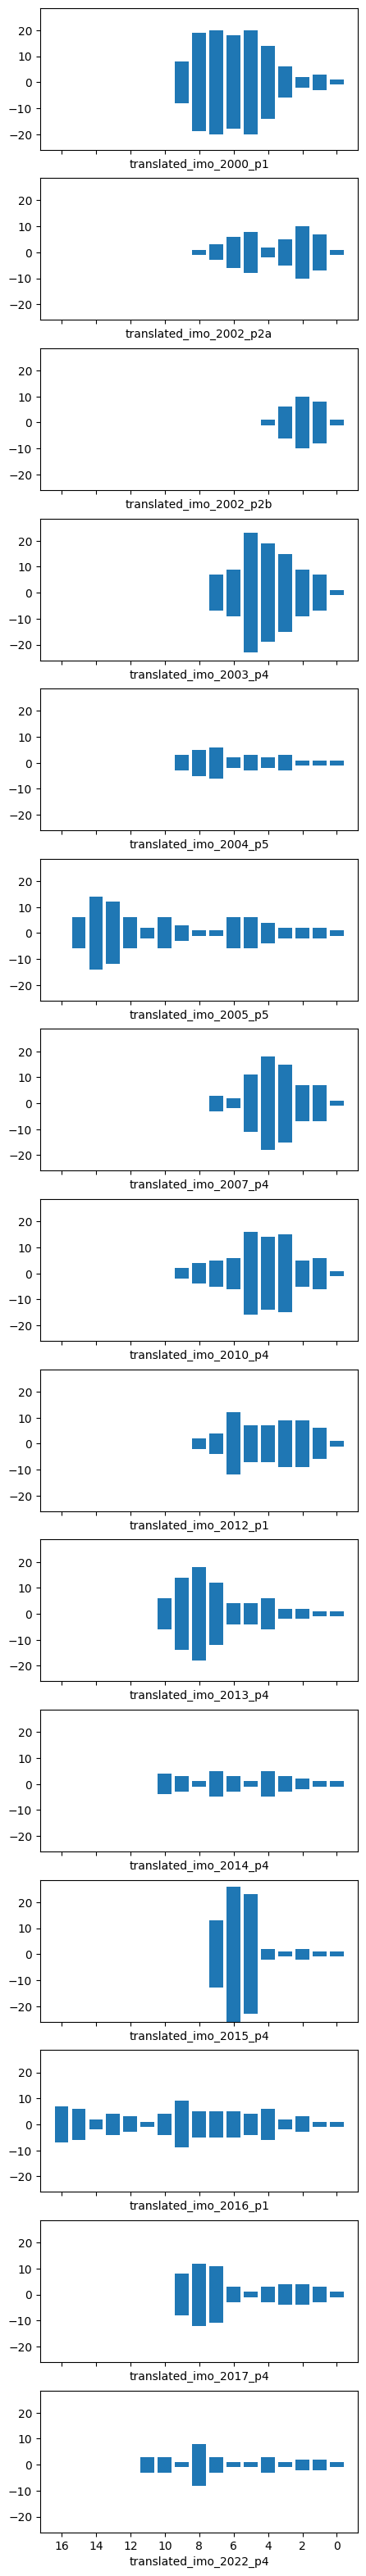

In [6]:
show_plt('exp', 'goals')

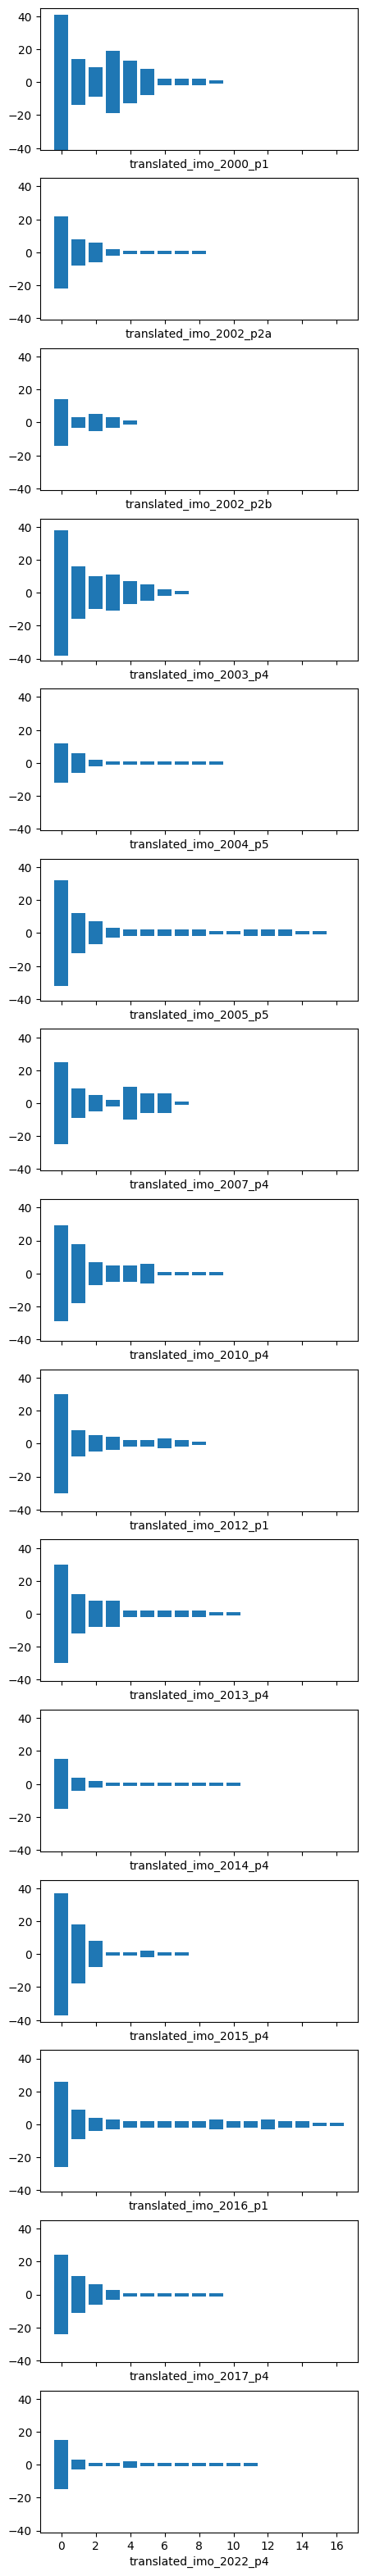

In [7]:
show_plt('exp', 'premises')

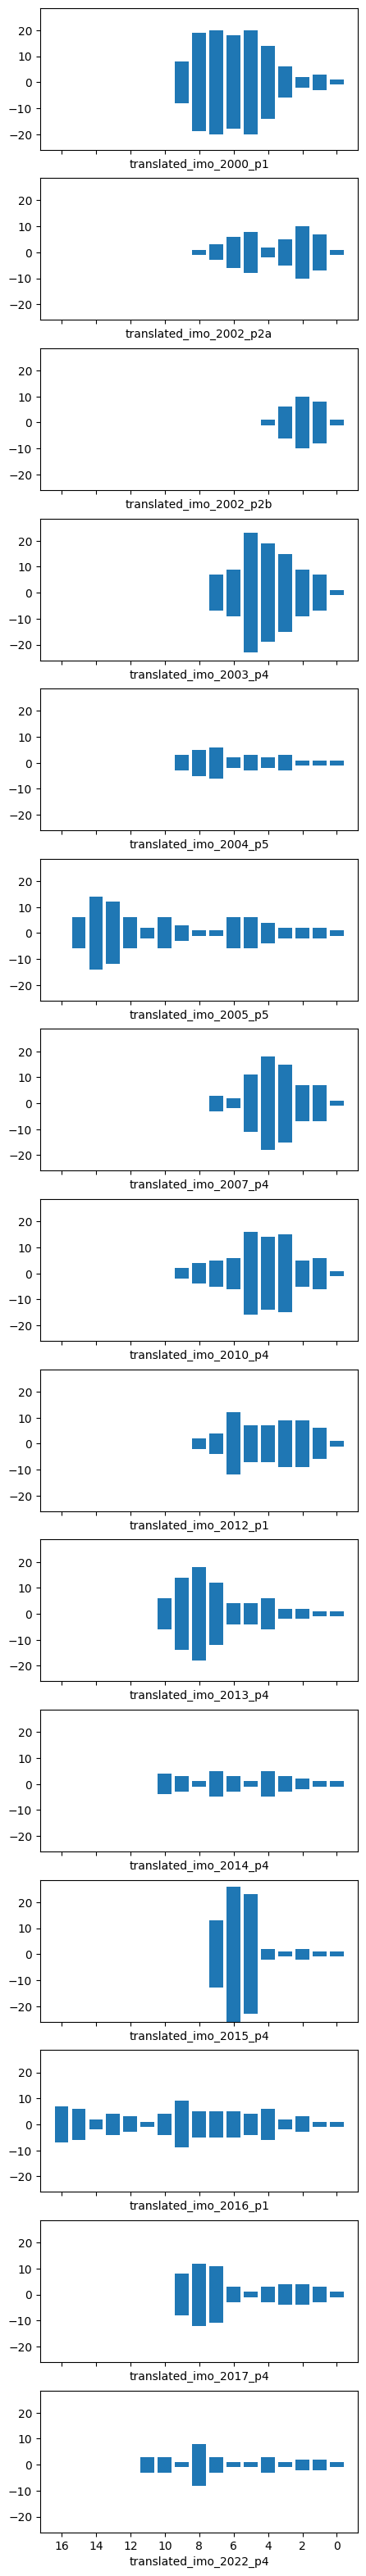

In [8]:
show_plt('opt', 'goals')

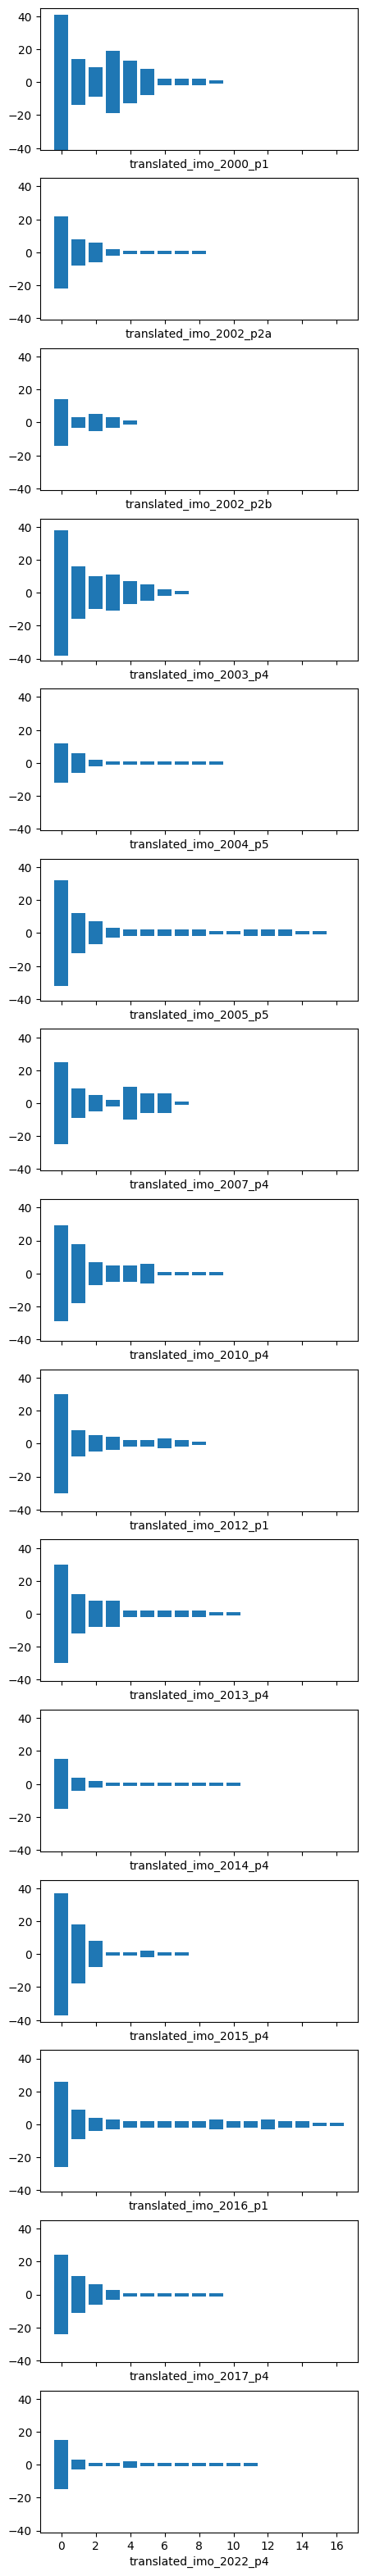

In [9]:
show_plt('opt', 'premises')